# Deep Learning ECG Heareat Categorization

https://www.kaggle.com/shayanfazeli/heartbeat#mitbih_test.csv

# Objective

Predict heart disease from a digitized ECG Reading

# Data Pre-Processing
Note: This dataset has already been scaled

In [1]:
import os
import tensorflow as tf
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd

In [3]:
# Training Data Paths
X_training_data = os.path.join("..", "Resources", "Train", "X_train.csv")
y_training_data = os.path.join("..", "Resources", "Train", "y_train.txt")

In [4]:
# Testing Data Paths
X_testing_data = os.path.join("..", "Resources", "Test", "X_test.csv")
y_testing_data = os.path.join("..", "Resources", "Test", "y_test.txt")

In [5]:
# Read the training data into a dataframe
X_train_df = pd.read_csv(
    X_training_data, delimiter=",", skiprows=1, header=None)
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.960,0.863,0.462,0.1970,0.0940,0.1250,0.0997,0.0883,0.0741,0.0826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000,0.659,0.186,0.0703,0.0703,0.0595,0.0568,0.0432,0.0541,0.0459,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925,0.666,0.541,0.2760,0.1960,0.0773,0.0718,0.0608,0.0663,0.0580,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967,1.000,0.831,0.5870,0.3570,0.2490,0.1460,0.0892,0.1170,0.1500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927,1.000,0.627,0.1930,0.0950,0.0725,0.0432,0.0535,0.0933,0.1900,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Convert the dataframe to a numpy array for Keras
X_train = X_train_df.values

In [7]:
# Read in the training labels as a dataframe
y_train_df = pd.read_csv(y_training_data)

# One-hot encode the integer labels
# 0 Normal_Beat
# 1 Supraventricular premature beat
# 2 Premature ventricular contraction
# 3 Fusion of ventricular and normal beat


y_train = to_categorical(y_train_df)
y_train[:10]
y_train.sum(axis=0)
72470/(len(y_train))

0.8933458248070807

In [8]:
# Read the testing data
X_test_df = pd.read_csv(X_testing_data, delimiter=",", skiprows=1, header=None)
X_test = X_test_df.values
X_test.shape

(20283, 187)

In [9]:
# Read the testing labels
y_test_df = pd.read_csv(y_testing_data)
# One-hot encode the integer labels
y_test = to_categorical(y_test_df)
y_test.shape

(20283, 4)

# Build a Deep Neural Network

In [10]:
# Create an empty sequential model
model = Sequential()

In [11]:
# Add the first layer where the input dimensions are the 187 columns of the training data
model.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))


Instructions for updating:
Colocations handled automatically by placer.


In [12]:
# Add a second hidden layer
model.add(Dense(100, activation='relu'))


In [13]:
# The output layer has 4 columns that are one-hot encoded
y_train.shape

(81122, 4)

In [14]:
# Add output layer
model.add(Dense(y_train.shape[1], activation="softmax"))

In [15]:
# Compile the model using categorical_crossentropy for the loss function, the adam optimizer,
# and add accuracy to the training metrics
model.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=['accuracy'])

In [16]:
# Use the training data to fit (train) the model
model.fit(
    X_train,
    y_train,
    epochs=100,
    shuffle=True,
    verbose=2,
    validation_data=(X_test, y_test)
)

Instructions for updating:
Use tf.cast instead.
Train on 81122 samples, validate on 20283 samples
Epoch 1/100
 - 9s - loss: 0.1893 - acc: 0.9471 - val_loss: 0.1320 - val_acc: 0.9636
Epoch 2/100
 - 8s - loss: 0.1192 - acc: 0.9672 - val_loss: 0.1101 - val_acc: 0.9718
Epoch 3/100
 - 8s - loss: 0.1026 - acc: 0.9713 - val_loss: 0.1056 - val_acc: 0.9713
Epoch 4/100
 - 8s - loss: 0.0925 - acc: 0.9742 - val_loss: 0.1018 - val_acc: 0.9734
Epoch 5/100
 - 8s - loss: 0.0855 - acc: 0.9759 - val_loss: 0.1178 - val_acc: 0.9670
Epoch 6/100
 - 8s - loss: 0.0812 - acc: 0.9769 - val_loss: 0.0908 - val_acc: 0.9760
Epoch 7/100
 - 8s - loss: 0.0746 - acc: 0.9781 - val_loss: 0.1068 - val_acc: 0.9708
Epoch 8/100
 - 8s - loss: 0.0706 - acc: 0.9794 - val_loss: 0.1000 - val_acc: 0.9732
Epoch 9/100
 - 8s - loss: 0.0674 - acc: 0.9800 - val_loss: 0.0875 - val_acc: 0.9769
Epoch 10/100
 - 8s - loss: 0.0635 - acc: 0.9809 - val_loss: 0.0814 - val_acc: 0.9780
Epoch 11/100
 - 8s - loss: 0.0602 - acc: 0.9815 - val_loss: 0

Epoch 94/100
 - 9s - loss: 0.0136 - acc: 0.9953 - val_loss: 0.1398 - val_acc: 0.9791
Epoch 95/100
 - 9s - loss: 0.0114 - acc: 0.9960 - val_loss: 0.1281 - val_acc: 0.9819
Epoch 96/100
 - 9s - loss: 0.0141 - acc: 0.9953 - val_loss: 0.1252 - val_acc: 0.9810
Epoch 97/100
 - 9s - loss: 0.0132 - acc: 0.9956 - val_loss: 0.1346 - val_acc: 0.9803
Epoch 98/100
 - 9s - loss: 0.0107 - acc: 0.9963 - val_loss: 0.1357 - val_acc: 0.9794
Epoch 99/100
 - 9s - loss: 0.0112 - acc: 0.9962 - val_loss: 0.1375 - val_acc: 0.9799
Epoch 100/100
 - 9s - loss: 0.0134 - acc: 0.9955 - val_loss: 0.1369 - val_acc: 0.9815


# Save the Trained Model

In [22]:
# Save the model
model.save("ECG_DNN_trained.h5")

# Evaluate the Model

In [16]:
# Load the model
from keras.models import load_model
model = load_model("ECG_DNN_trained.h5")

Instructions for updating:
Use tf.cast instead.


In [17]:
# Evaluate the model using the training data
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.1368638020454653, Accuracy: 0.9814623083252764


In [18]:
# Grab just one data point to test with
test = np.expand_dims(X_test[19245], axis=0)
test.shape

(1, 187)

In [69]:
# Make a prediction. 

print(f"Predicted class: {model.predict_classes(test)}")
print(f"Predicted %: {model.predict_proba(test)}")

Predicted class: [2]
Predicted %: [[7.0780303e-25 7.3385065e-19 1.0000000e+00 1.2242778e-29]]


In [50]:
# Confusion Matrix
y_true_classes =  [np.argmax(a) for a in y_test]

In [51]:
y_pred = model.predict(X_test)
y_pred.shape

(20283, 4)

In [52]:
y_pred_classes = [np.argmax(a) for a in y_pred]
len(y_pred_classes)

20283

In [53]:
from sklearn.metrics import confusion_matrix

a = confusion_matrix(y_true_classes, y_pred_classes, labels=[0,1,2,3])
a

array([[18028,    48,    37,     4],
       [  141,   407,     6,     2],
       [   75,     8,  1349,    16],
       [   25,     1,    13,   123]], dtype=int64)

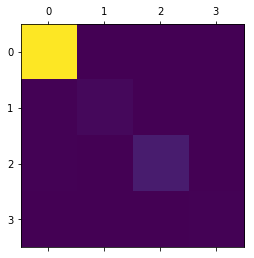

In [68]:
%matplotlib inline
from matplotlib.pyplot import matshow

matshow(a)

In [57]:
from matplotlib import pyplot
pyplot.show()